This is the initial EDA of the sales and shipment of products and building of models for determining the shipping cost based on the variables involved in shipping

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime, date, time

In [2]:
# Reading the dataset into the notebook
df = pd.read_csv('sales.csv')
df.head()

,Order ID,Customer ID,Sales Person,Order Date,Ship Date,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,Discount Percent,Shipping Amount,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost
0,13729,C508,Mr Robert Carlton,1/1/2017,1/3/2017,Not Specified,SKU947,9,95.99,1,8%,35.00,Express Air,Large Box,863.91,69.1128,794.7972,829.7972
1,28774,C372,Miss Roseanna Marr,1/1/2017,1/2/2017,High,SKU937,32,5.98,1,10%,4.69,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140
2,9285,C212,Mr Robert Carlton,1/2/2017,1/4/2017,Critical,SKU363,3,40.98,6,6%,2.99,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536
3,37537,C015,Mr Robert Carlton,1/2/2017,1/2/2017,Low,SKU052,4,291.73,58,0%,48.80,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200
4,37537,C015,Mr Robert Carlton,1/2/2017,1/4/2017,Low,SKU063,43,100.98,45,7%,45.00,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902


In [3]:
# Let's get a better understanding of the data
df.describe()

,Order ID,Order Quantity,Unit Sell Price,Unit Cost Price,Shipping Amount,Cost,Discount Amount,Discount Cost,Total Discounted Cost
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,29965.183950,25.571735,89.346259,22.737826,12.838557,1846.312055,91.276222,1755.035833,1767.874390
std,17260.883221,14.481071,290.354383,92.055619,17.264052,3710.265557,219.699498,3538.264045,3545.674373
min,3.000000,1.000000,0.990000,1.000000,0.490000,1.480000,0.000000,1.465200,2.165200
25%,15011.500000,13.000000,6.480000,2.000000,3.300000,140.150000,3.787500,133.221700,138.570550
50%,29857.000000,26.000000,20.990000,4.000000,6.070000,450.890000,16.128000,427.700000,437.350000
75%,44596.000000,38.000000,85.990000,18.000000,13.990000,1781.645000,72.720750,1681.944050,1705.749900
max,59973.000000,50.000000,6783.020000,3159.000000,164.730000,88179.260000,4883.774400,88179.260000,88203.750000


In [4]:
# Data format of the columns
df.dtypes

Order ID                   int64
Customer ID               object
Sales Person              object
Order Date                object
Ship Date                 object
Order Priority            object
SKU Code                  object
Order Quantity             int64
Unit Sell Price          float64
Unit Cost Price            int64
Discount Percent          object
Shipping Amount          float64
Ship Mode                 object
Container                 object
Cost                     float64
Discount Amount          float64
Discount Cost            float64
Total Discounted Cost    float64
dtype: object

In [5]:
# Checking if there is any missing values in the data
df.isnull().sum()

Order ID                 0
Customer ID              0
Sales Person             0
Order Date               0
Ship Date                0
Order Priority           0
SKU Code                 0
Order Quantity           0
Unit Sell Price          0
Unit Cost Price          0
Discount Percent         0
Shipping Amount          0
Ship Mode                0
Container                0
Cost                     0
Discount Amount          0
Discount Cost            0
Total Discounted Cost    0
dtype: int64

## Data visualization

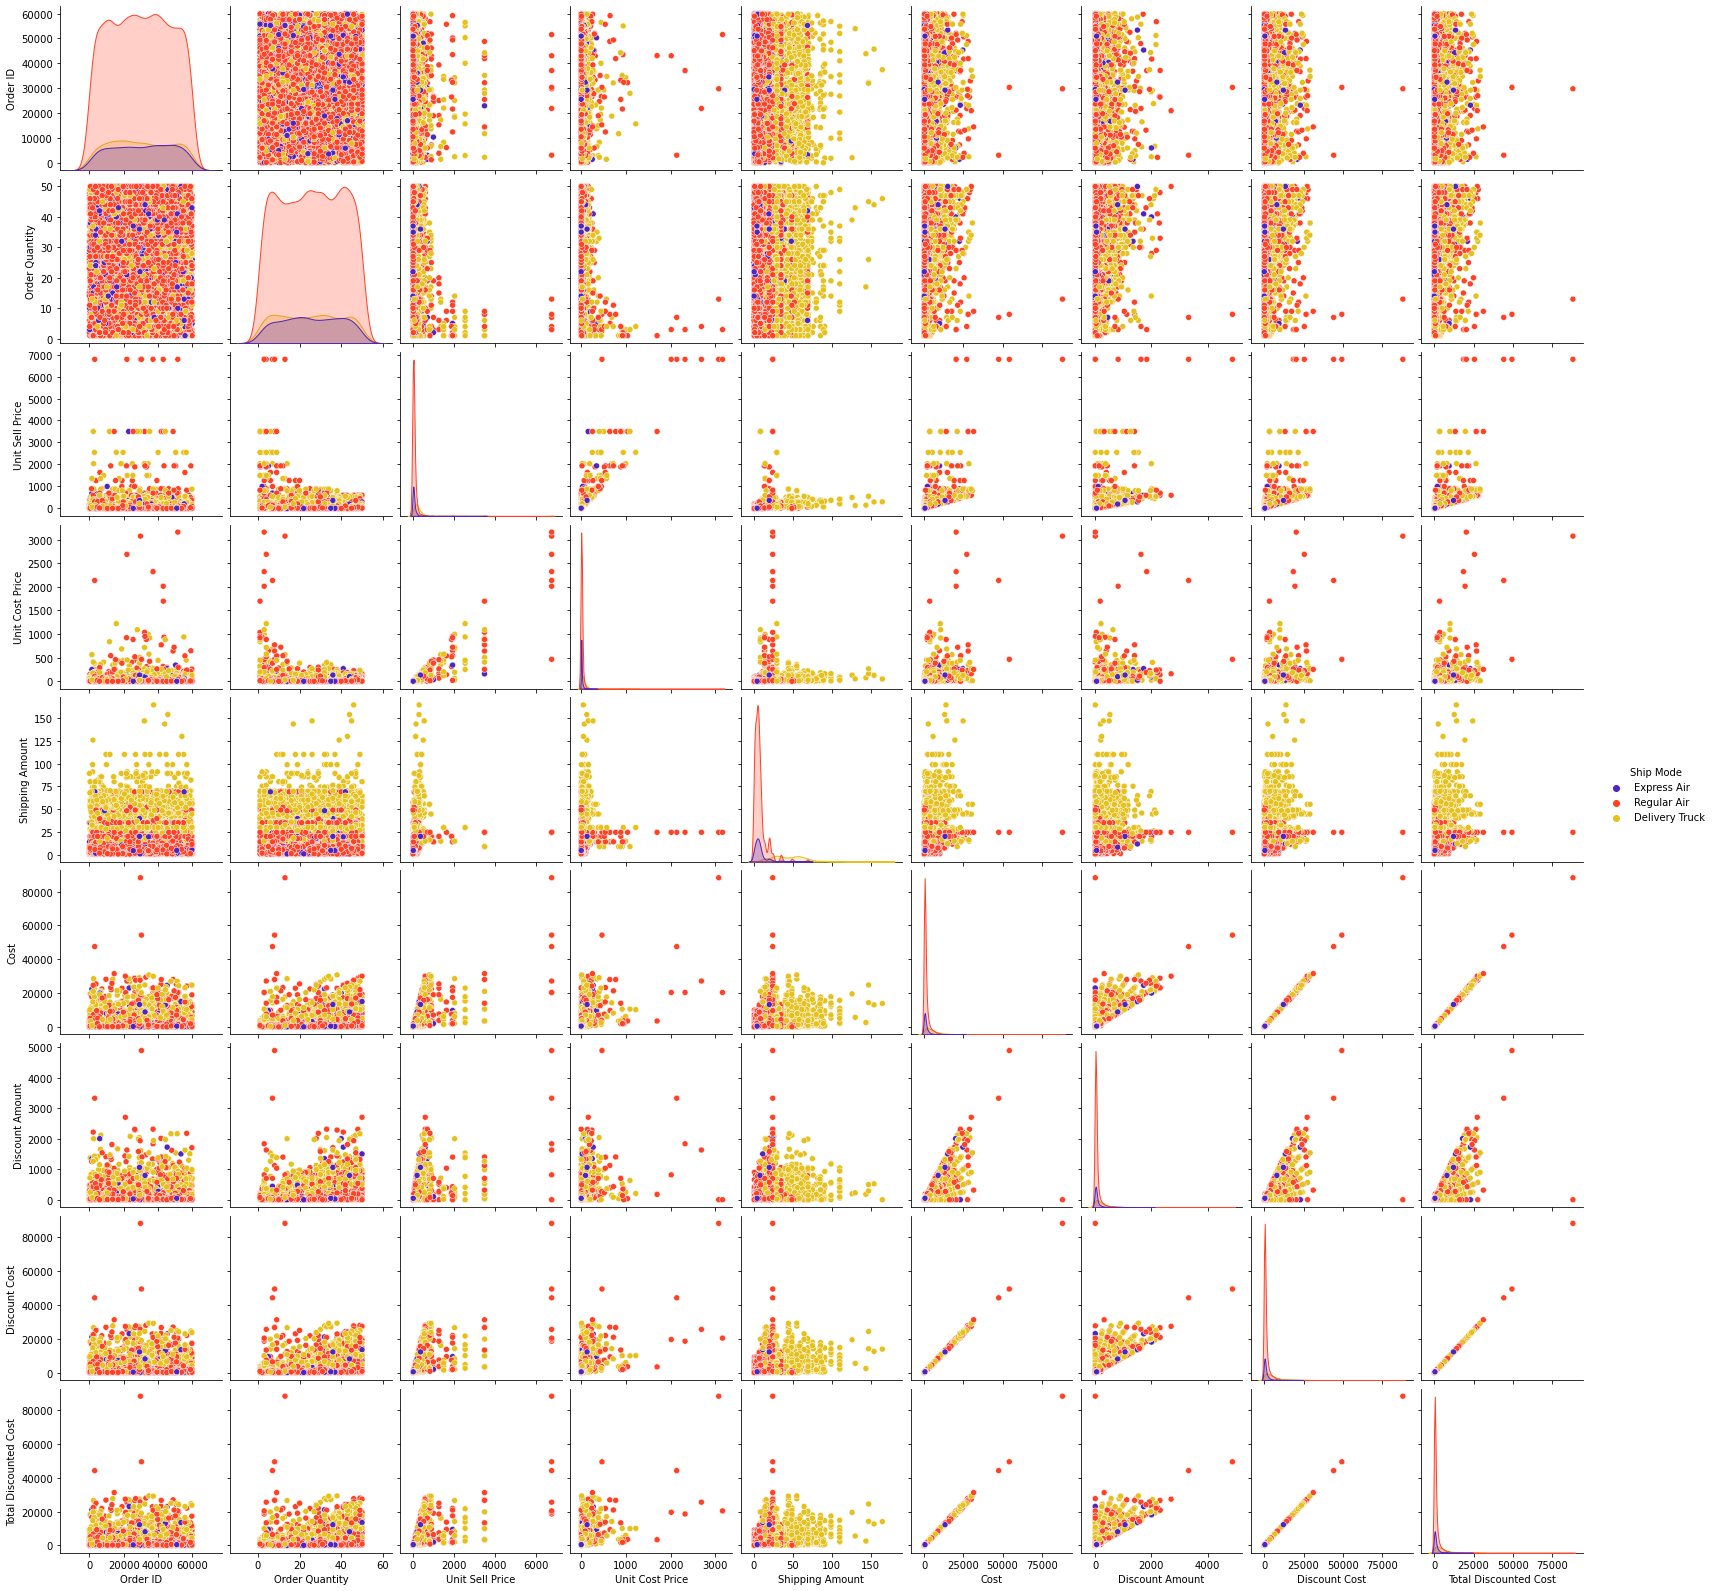

In [6]:
# Pair plot with mode of shipping
sns.pairplot(df, hue = 'Ship Mode', palette = "CMRmap")
plt.show()

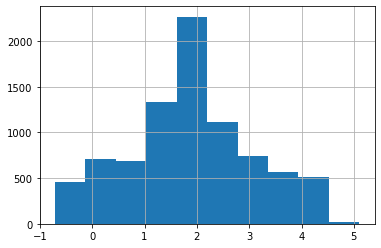

In [7]:
# Plot showing the log distribution of the shipping amount
log_shipping_amount = np.log(df['Shipping Amount'])
log_shipping_amount.hist()
plt.show()

<AxesSubplot:>

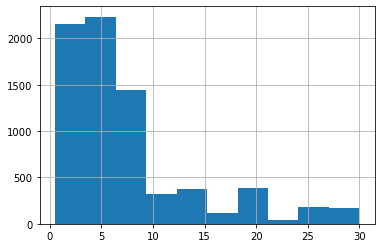

In [8]:
# Checking the distribution of the shipping amout column without using log distribution
Q3 = np.quantile(df['Shipping Amount'], 0.75)
Q1 = np.quantile(df['Shipping Amount'], 0.25)
IQR = Q3 - Q1

upper_range = Q3 + 1.5 * IQR

out_rmv = df[df['Shipping Amount'] < upper_range]
out_rmv['Shipping Amount'].hist()

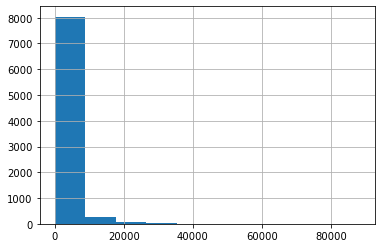

In [9]:
# Plot showing the distribution of the Total amount
df['Total Discounted Cost'].hist()
plt.show()

As seen in below, small box containers are the most used means of delivery regardless of the shipping mode

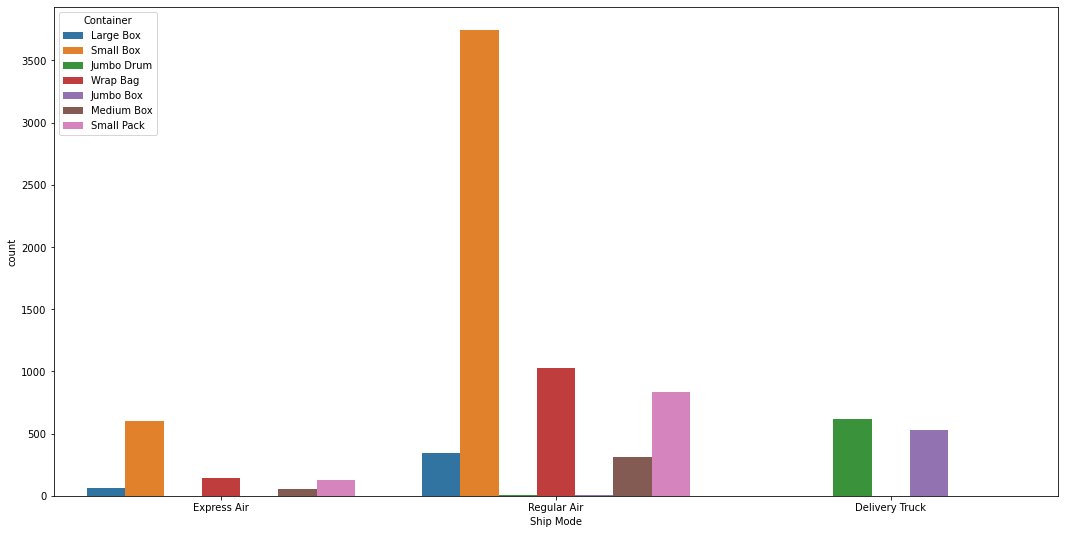

In [10]:
# A plot of the number of times contianers column was used with the shipping mode
plt.figure(figsize = (18,9))
sns.countplot(x= 'Ship Mode', hue = 'Container', data = df)
plt.show()

The box plot below shows that with regards to shipping amount and container there are sevreal outliers but this can be attributed to the order quatity

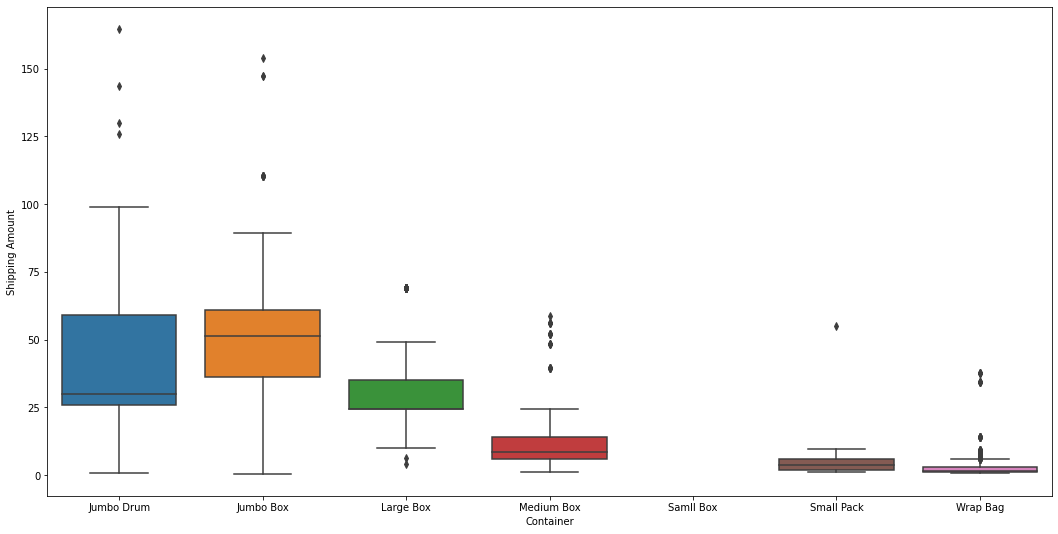

In [11]:
# Boxplot showing the distributing of shipping amount of containers
plt.figure(figsize = (18,9))
sns.boxplot(x = "Container", y = "Shipping Amount", data = df, order = ['Jumbo Drum', 'Jumbo Box', 'Large Box', "Medium Box", "Samll Box", 'Small Pack', 'Wrap Bag'])
plt.show()

As seen in the plot above, there are a lot of outliers with the jumbo containers (Jumbo drums and Jumbo box) having the the widest distribution range and jumbo box having the highest median and wrap bag having the lowest median

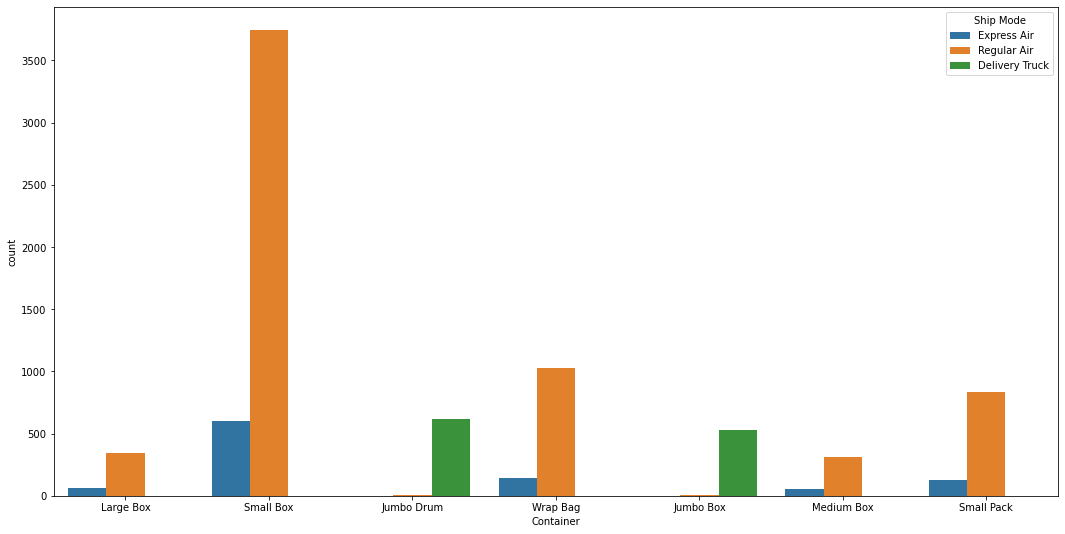

In [12]:
# A look at container type to shipping mode
plt.figure(figsize = (18,9))
sns.countplot(x = "Container", hue = "Ship Mode", data = df)
plt.show()

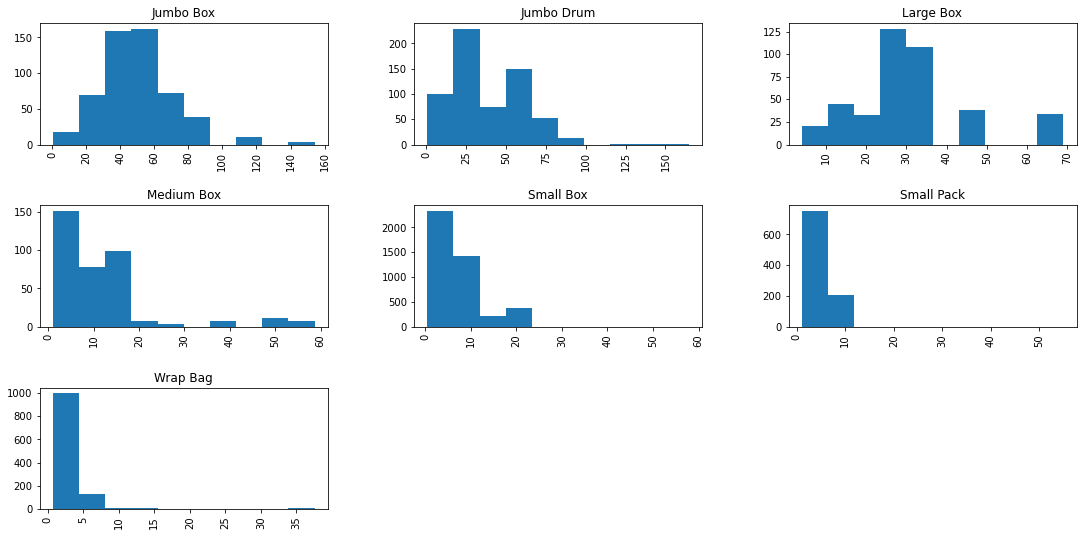

In [13]:
# Shipping amount distribution to container
df.hist(by = "Container", column = "Shipping Amount", figsize =( 18,9))
plt.show()

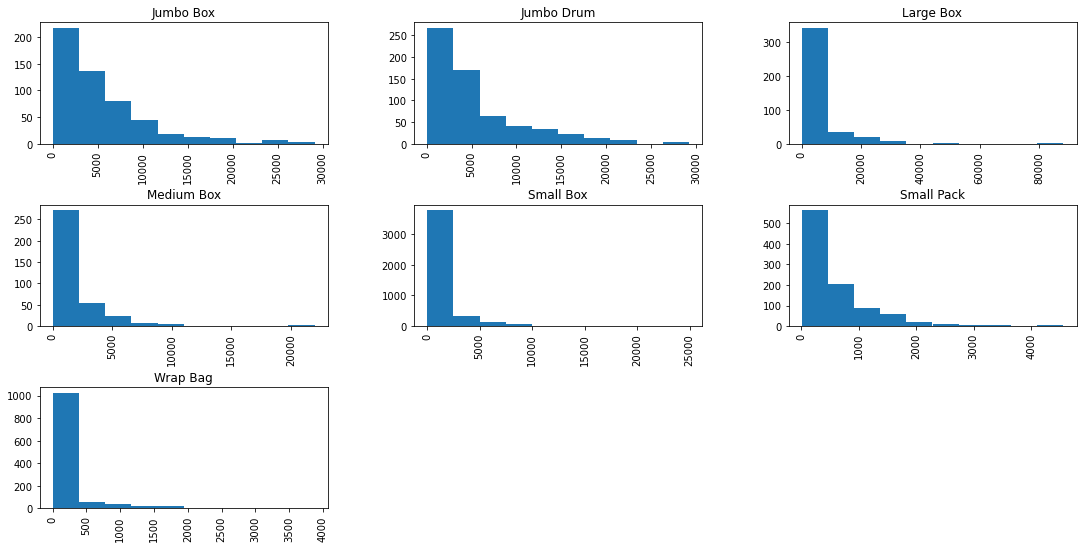

In [14]:
# Total discounted amount distribution to container
df.hist(by = "Container", column = "Total Discounted Cost", figsize =( 18,9))
plt.show()

The histograms above show that majority of the goods with regard to their containers are below 1000 with the histogram distributions showing a skewness to the right. This indicates there are more values 

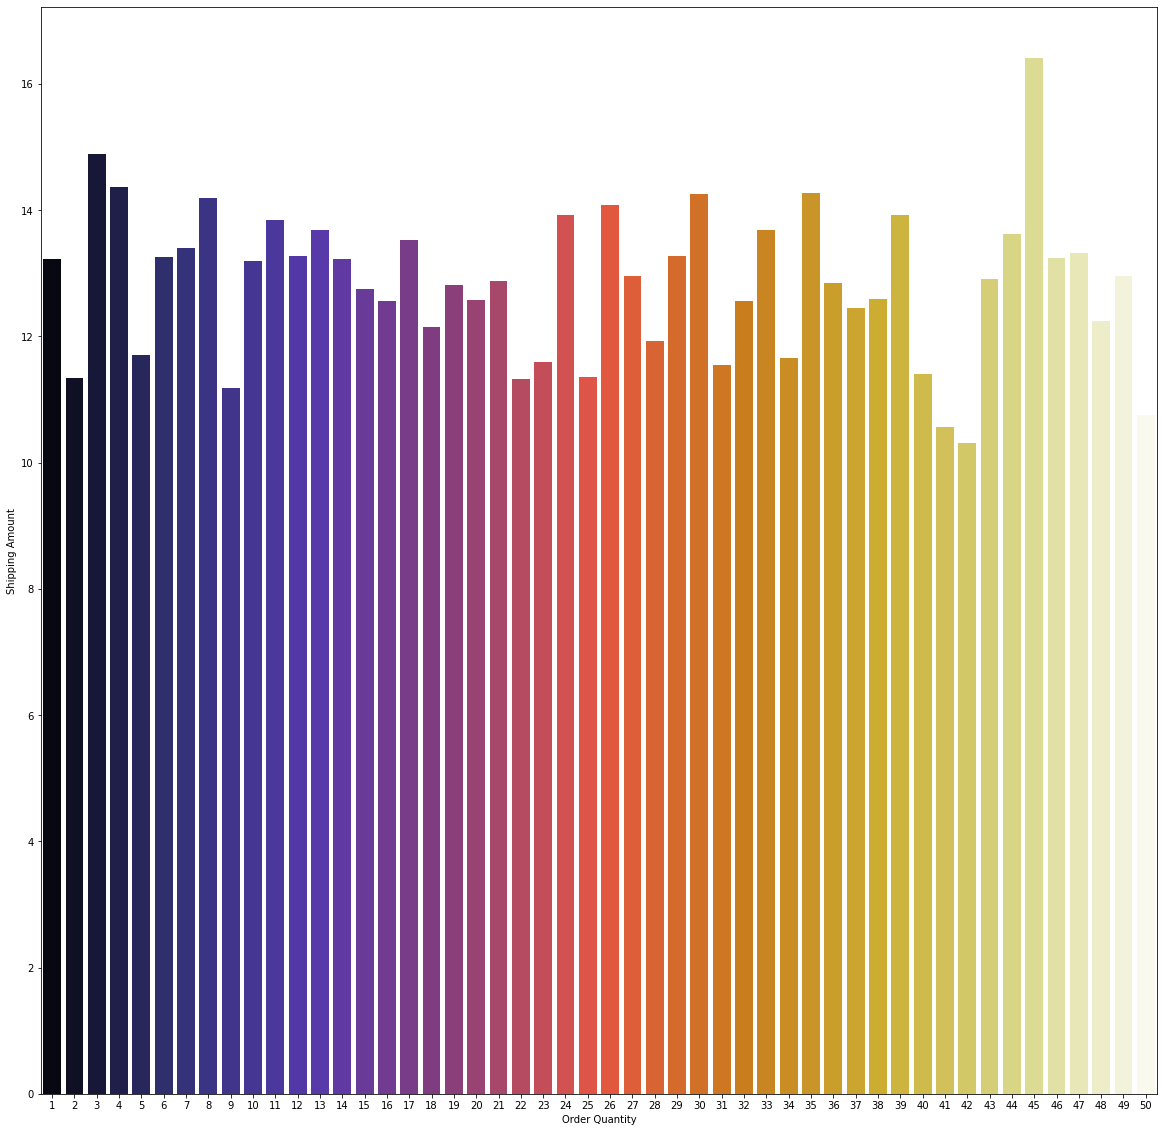

In [15]:
# Shipping amount to order quantity
plt.figure(figsize = (20,20))
sns.barplot(x = 'Order Quantity', y = 'Shipping Amount', data = df, palette = "CMRmap", ci = None)
plt.show()

In [16]:
#Importing the Datetime library to format the date columns 
from datetime import datetime, date, time

df['Order Date'] = pd.to_datetime(df["Order Date"], errors= "coerce")
df['Ship Date'] = pd.to_datetime(df["Ship Date"], errors= "coerce")

In [17]:
# Creating day, year and month columns
import datetime as dt
df["Ship Day"]=df['Ship Date'].dt.day
df['Ship Year']=df['Ship Date'].dt.year
df['Ship Month']=df['Ship Date'].dt.month

In [18]:
# A copy of the dataframe to be used
df2 = df.copy()

In [19]:
# Converting object columns to categorical columns
cols = ['Order Priority', 'Ship Mode', 'Container']
df2[cols] = df2[cols].astype('category')

Order ID                -0.004582
Order Quantity          -0.011457
Unit Sell Price          0.239959
Unit Cost Price          0.194791
Shipping Amount          1.000000
Cost                     0.427822
Discount Amount          0.344250
Discount Cost            0.427244
Total Discounted Cost    0.431221
Ship Day                -0.021660
Ship Year               -0.008038
Ship Month               0.003519
Name: Shipping Amount, dtype: float64


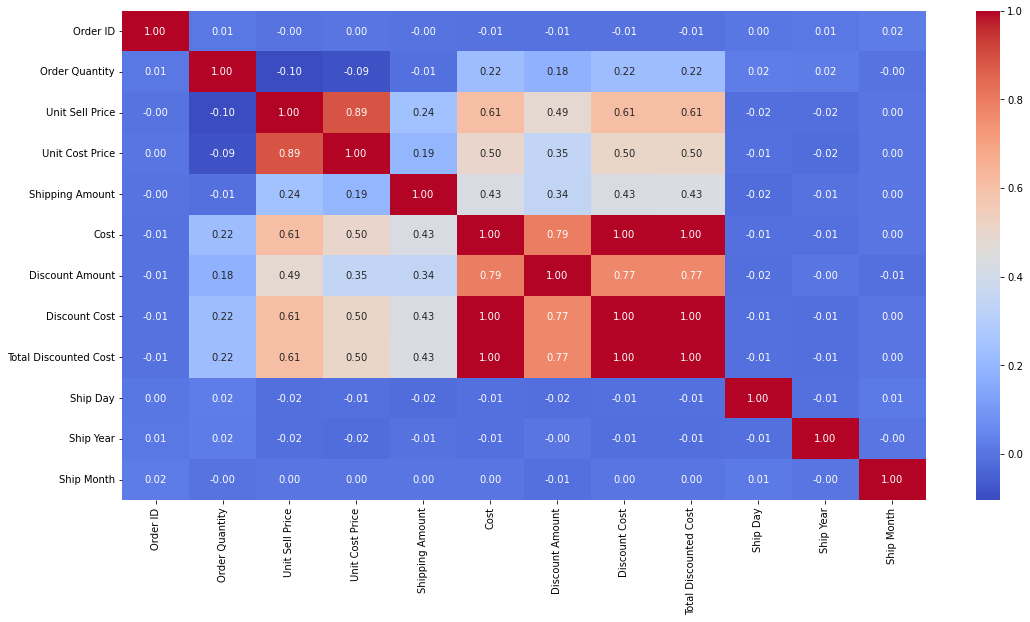

In [20]:
# A look at the corrolation between features
corr = df.corr()
print(corr['Shipping Amount'])

# Plotting correlation heatmap
plt.figure(figsize = (18,9))
sns.heatmap(corr, annot = True, fmt =".2f", cmap = "coolwarm")
plt.show()

# Model preprocessing

In [21]:
# Columns to drop for the model
df2.drop(["Shipping Amount", 'Order Date', 'Ship Date', 'Discount Percent', 'Order ID', 'Customer ID'], axis = 1)

,Sales Person,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost,Ship Day,Ship Year,Ship Month
0,Mr Robert Carlton,Not Specified,SKU947,9,95.99,1,Express Air,Large Box,863.91,69.1128,794.7972,829.7972,3,2017,1
1,Miss Roseanna Marr,High,SKU937,32,5.98,1,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140,2,2017,1
2,Mr Robert Carlton,Critical,SKU363,3,40.98,6,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536,4,2017,1
3,Mr Robert Carlton,Low,SKU052,4,291.73,58,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200,2,2017,1
4,Mr Robert Carlton,Low,SKU063,43,100.98,45,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902,4,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Mr Robert Carlton,Low,SKU979,31,19.98,9,Regular Air,Small Box,619.38,0.0000,619.3800,623.3800,30,2020,12
8395,Mr Robert Carlton,Low,SKU883,1,832.81,14,Regular Air,Medium Box,832.81,74.9529,757.8571,782.3471,30,2020,12
8396,Mrs Gail Johnson,Not Specified,SKU114,45,13.73,5,Regular Air,Wrap Bag,617.85,49.4280,568.4220,575.2720,30,2020,12
8397,Mrs Gail Johnson,Not Specified,SKU066,6,60.98,5,Delivery Truck,Jumbo Drum,365.88,21.9528,343.9272,373.9272,30,2020,12


In [22]:
# 
for cols in df.columns:
    print('Column {} and type {}'.format(cols, df[cols].dtype), '\n')

Column Order ID and type int64 

Column Customer ID and type object 

Column Sales Person and type object 

Column Order Date and type datetime64[ns] 

Column Ship Date and type datetime64[ns] 

Column Order Priority and type object 

Column SKU Code and type object 

Column Order Quantity and type int64 

Column Unit Sell Price and type float64 

Column Unit Cost Price and type int64 

Column Discount Percent and type object 

Column Shipping Amount and type float64 

Column Ship Mode and type object 

Column Container and type object 

Column Cost and type float64 

Column Discount Amount and type float64 

Column Discount Cost and type float64 

Column Total Discounted Cost and type float64 

Column Ship Day and type int64 

Column Ship Year and type int64 

Column Ship Month and type int64 



In [23]:
# Creating a list of columns to encode
obj_cols = ['Order Priority', 'Ship Mode', 'Container']

# List of columns that are to be dropped
cols_to_drop = ["Shipping Amount", 'Order Date', 'Ship Date', 'Discount Percent', 'Order ID', 'Customer ID', 'Order Priority', 'Ship Mode', 'Container', 'Sales Person', 'SKU Code', 'Ship Day', 'Ship Month']

# Encoding features for model
dfle = pd.get_dummies(df2[obj_cols], drop_first = True)
dfle

,Order Priority_High,Order Priority_Low,Order Priority_Medium,Order Priority_Not Specified,Ship Mode_Express Air,Ship Mode_Regular Air,Container_Jumbo Drum,Container_Large Box,Container_Medium Box,Container_Small Box,Container_Small Pack,Container_Wrap Bag
0,0,0,0,1,1,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0,1,0,0,0,1,0,0,0,1,0,0
8395,0,1,0,0,0,1,0,0,1,0,0,0
8396,0,0,0,1,0,1,0,0,0,0,0,1
8397,0,0,0,1,0,0,1,0,0,0,0,0


## Building the model

In [24]:
# Dropping columns
df_d = df2.drop(cols_to_drop, axis = 1)

# Combining encoded columns and other columns
new_df = pd.concat([df_d, dfle], axis = 1)
new_df.columns

X = new_df.values
y = df['Shipping Amount'].values

In [25]:
# Importing from test_train_split from Sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 56)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6299, 20) (2100, 20) (6299,) (2100,)


## Linear Regression Model

In [28]:
# Importing Libraries and running the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

def model_run(model, X_train, y_train, X_test, y_test):
    """Function to run model"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = model.score(X_test, y_test)
    if acc_score > 0.90: 
        print("{} Quite a good score".format(acc_score))
    else:
        print("{} Not good enough work on your model".format(acc_score))

In [29]:
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [32]:
# Score and mse of the model
mean = np.mean(cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))
lin_score = lin_reg.score(X_test, y_test)
print(lin_score, mean)

1.0 -8.249029350089915e-13


## Random Forest Model

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Creating a function to determine the root mean square error of the model
def get_rmse_des(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=76, n_estimators = 200)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mse = mean_squared_error(y_test, preds_val)
    rmse = np.sqrt(mse)
    rf_score = model.score(X_test, y_test)
    print(rf_score)
    return rmse

# A for loop for the function
for max_leaf_nodes in range(500, 1000, 50):
    best_rmse = []
    leaf_nodes = []
    rmse = get_rmse_des(max_leaf_nodes, X_train, X_test, y_train, y_test)
    leaf_nodes.append(max_leaf_nodes)
    best_rmse.append(best_rmse)
    if max(best_rmse) > best_rmse[-1]:
        print("Max leaf nodes: %d  \t\t Root mean Square Error:  %d" %(max_leaf_nodes, best_rmse))

0.8419148064995886
0.8422128222632141
0.8423738504607508
0.8424545608277166
0.8425846571113724
0.8426288360312045
0.8426582737668242
0.8426897401000819
0.8427077241233661
0.8427238537666524


In [89]:
rf_score

NameError: name 'rf_score' is not defined

# Ridge Model

In [75]:
# Importing ridge and running the model
from sklearn.linear_model import Ridge
R = Ridge(alpha=45, max_iter=4000)
R.fit(X_train, y_train)
R_pred = R.predict(X_test)

0.999999995791815

In [84]:
# Score and mse  of the model
ridge_score = R.score(X_test, y_test)
r_mse = mean_squared_error(y_test, R_pred)
r_rmse = np.sqrt(mse)
print(ridge_score, mse, rmse)

0.999999995791815 1.3498832452565922e-06 0.0011618447595339889


In [ ]:
score = pd.DataFrame('linear regression score': lin_score, 'Random forest score' : , 'Ridge score': )

As see